# Statistical Hypothesis Testing

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [39]:
df = pd.read_csv('../data/waze_dataset.csv')

## Assumptions and Steps

Assumptions of a hypothesis test:
* Independence: Observations should be independent of each other.
* Random sampling: The data should be collected using a random sampling method to ensure representativeness.
* Normality: The sampling distribution of the test statistic should be approximately normally distributed. Thanks to the Central Limit Theorem, for sample sizes typically n ≥ 30, the sampling distribution tends to be approximately normal even if the underlying data is not.

Steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

* A 5% significance level (α = 0.05) is chosen for all hypothesis tests.

* Since the dataset is a sample with unknown and potentially unequal population variances, equal_var is set to False in stats.ttest_ind() to relax the equal variance assumption.

## Hypothesis Testing: Comparison of Driving Activity Between iPhone and Android Users

### Descriptive Statistics

In [40]:
df.groupby('device')['drives'].mean()

device
Android    66.231838
iPhone     67.859078
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.

$H_0$ : The average number of drives for iPhone users is equal to that for Android users. $\mu_{\text{iPhone}} = \mu_{\text{Android}}$

$H_A$ : The average number of drives for iPhone users is not equal to that for Android users. $\mu_{\text{iPhone}} \neq \mu_{\text{Android}}$

In [67]:
iphone_drives = df[df['device'] == 'iPhone']['drives']
android_drives = df[df['device'] == 'Android']['drives']

In [61]:
print(iphone_drives.shape)
print(android_drives.shape)

(9672,)
(5327,)


### Visualizations

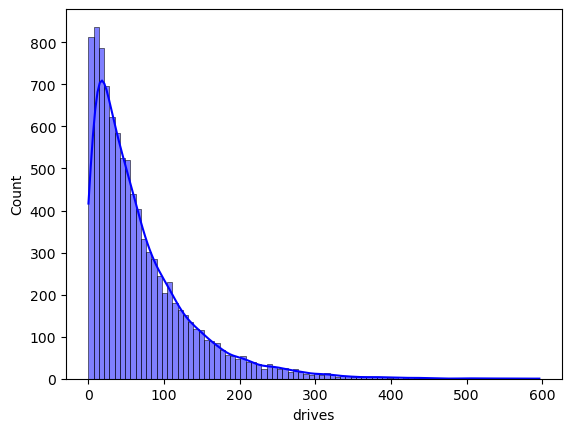

In [68]:
sns.histplot(iphone_drives, kde = True, color = 'blue');

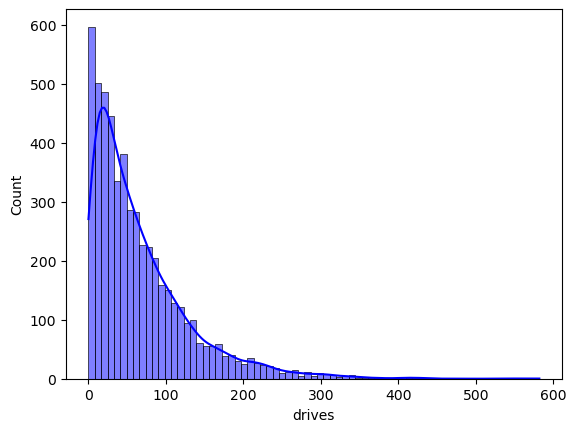

In [69]:
sns.histplot(android_drives, kde = True, color = 'blue');

### Hypothesis Testing

In [63]:
# Perform the t-test
statistic, p_value, = stats.ttest_ind(a = iphone_drives, b = android_drives, equal_var = False)
print(p_value)

0.143351972680206


The p-value for the hypothesis test is 0.143 (14.3%). Since 14.3% is greater than the preset significance level of 5%, we fail to reject the null hypothesis. Therefore, there is not enough evidence to conclude that the average number of drives differs between iPhone and Android users, and that any observed difference is likely due to random chance.

### Business Insights

* Device type likely does not influence driving behavior in terms of frequency.

* Marketing campaigns and resource allocation for user engagement can be designed and distributed universally across iPhone and Android users.

* Product features related to driving can be applied broadly across both platforms.

* Further analysis may be needed to explore other user behaviors or segments where device type matters.

## Hypothesis Testing: Impact of Driving Activity on User Retention

### Descriptive Statistics

In [43]:
df.groupby('label')['drives'].mean()

label
churned     72.730678
retained    66.075491
Name: drives, dtype: float64

$H_0$ : The average number of drives for churned users is equal to that for retained users. $\mu_{\text{churned}} = \mu_{\text{retained}}$

$H_A$ : The average number of drives for churned users is not equal to that for retained users. $\mu_{\text{churned}} \neq \mu_{\text{retained}}$

In [70]:
churned_drives = df[df['label'] == 'churned']['drives']
retained_drives = df[df['label'] == 'retained']['drives']

In [94]:
print(churned_drives.shape)
print(retained_drives.shape)

(2536,)
(11763,)


### Visualizations

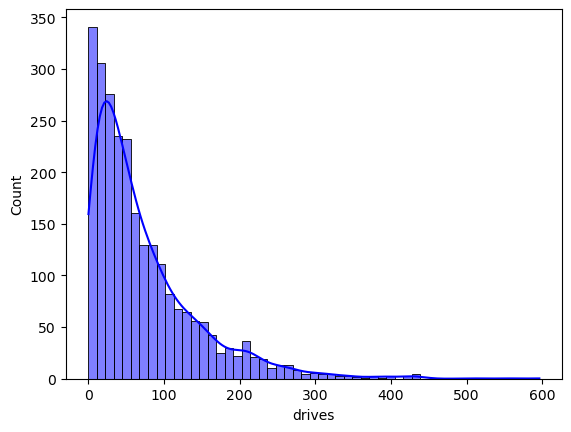

In [72]:
sns.histplot(churned_drives, kde = True, color = 'blue');

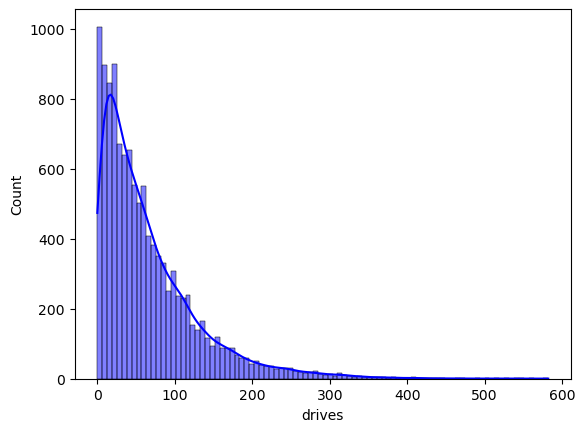

In [73]:
sns.histplot(retained_drives, kde = True, color = 'blue');

### Hypothesis Testing

In [75]:
# Perform the t-test
statistic, p_value, = stats.ttest_ind(a = churned_drives, b = retained_drives, equal_var = False)
print(p_value)

1.804915245718726e-05


The p-value for the hypothesis test is 0.000018 or 0.0018%. Since 0.0018% is much smaller than the preset significance level of 5%, we reject the null hypothesis. Therefore, there is enough evidence to conclude that the average number of drives differs between churned and retained users, and that any observed difference is highly unlikely to be due to random chance.

### Business Insights

* Driving activity is a strong indicator of user retention.

* Retention strategies should focus on increasing driving activity.

* Target low-drive users with re-engagement campaigns.

## Hypothesis Testing: App Usage Activity Differences Between Churned and Retained Users

### Descriptive Statistics

In [80]:
df.groupby('label')['activity_days'].mean()

label
churned      9.644716
retained    16.816628
Name: activity_days, dtype: float64

$H_0$ : There is no difference in the average number of app activity days between retained and churned users. $\mu_{\text{churned}} = \mu_{\text{retained}}$

$H_A$ : There is a significant difference in the average number of app activity days between retained and churned users. $\mu_{\text{churned}} \neq \mu_{\text{retained}}$

In [86]:
churned_activity = df[df['label'] == 'churned']['activity_days']
retained_activity = df[df['label'] == 'retained']['activity_days']

In [84]:
print(churned_activity.shape)
print(retained_activity.shape)

(2536,)
(11763,)


### Visualizations

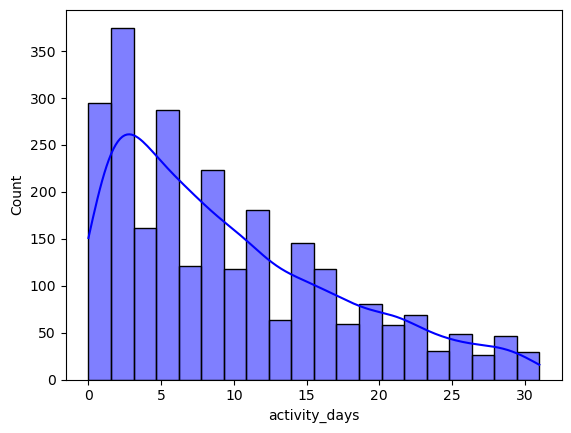

In [82]:
sns.histplot(churned_activity, kde = True, color = 'blue');

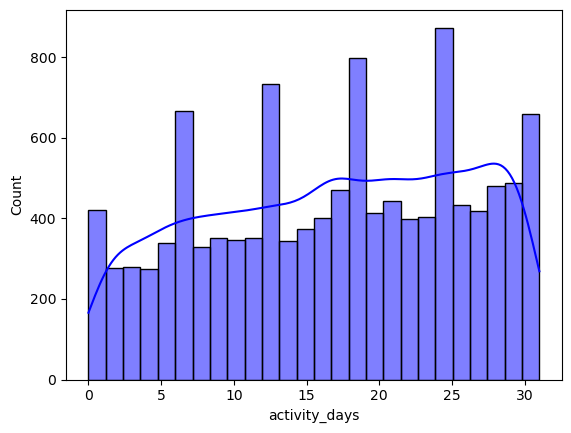

In [83]:
sns.histplot(retained_activity, kde = True, color = 'blue');

### Hypothesis Testing

In [88]:
# Perform the t-test
statistic, p_value = stats.ttest_ind(a = churned_activity, b = retained_activity, equal_var = False)
print(p_value)

0.0


The p-value for the hypothesis test is approximately 0, indicating an extremely small probability that the observed difference occurred by random chance. Since this is far below the preset significance level of 5%, we reject the null hypothesis. Therefore, there is strong evidence to conclude that the average activity days differs significantly between churned and retained users.

### Business Insights

* App activity is strongly associated with user retention.

* Low activity days are a red flag for churn.

* Product and marketing teams should collaborate to keep users engaged.